Quoting the description:

> This algorithm finds the most unexpected events in a set of geographic events relative to some reference set of events

<img src="Screenshot1.png" />

Assume Linhda is tracking me.  I mean we have a healthy relationship.  It seems like she might secretly monitor my whereabouts, that seems reasonable.  But what if I didn't want her to know that I'd visited the comic book store.  Now she's a busy woman, so she's probably using an algorithm.

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import Algorithmia
import numpy as np

In [23]:
data = [[47.625401388, -122.341846999], [47.627424837, -122.339708605]]
reference = [[47.610975162999999, -122.33814674799999], [47.610440244999999, -122.33689051499999]]

In [24]:
input = {"data": data, "reference": reference, "n": 3}
client = Algorithmia.client('sime9LW7bScBtTy8eag15oGxNKc1')
algo = client.algo('sklearn/GeographicOutlierDetection/0.2.5')
resp = algo.pipe(input)
print resp

AlgoResponse(result={u'logprobs': {u'1': 4.527756077683622, u'0': 4.511270356968919}, u'outliers': [1, 0], u'all_lp': [4.527756077683622, 4.511270356968919]},metadata=Metadata(content_type='json',duration=0.350456319,stdout=None))


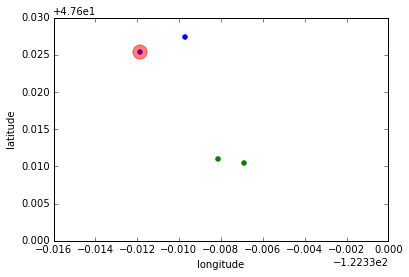

In [54]:
references = input['reference']
data = input['data']
outliers = resp.result['outliers']

lats = []
lons = []
for reference in references:
    lats.append(reference[0])
    lons.append(reference[1])

plt.scatter(lons, lats, color='green')


lats = []
lons = []
for reference in data:
    lats.append(reference[0])
    lons.append(reference[1])

plt.scatter(lons, lats, color='blue')

filter = np.array(data[0]) * np.array(outliers) > 0
plt.scatter(np.array(lons)[filter], np.array(lats)[filter], color='red', alpha=0.5, s=200)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

# Demo of algorithm with real data
# Discussion of why it would be used
# How to hack it

scores below are 0 - 4